#### General setup.
___

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os

%matplotlib inline

In [2]:
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (12, 4)

<br>

#### Loading the data.
___

In [3]:
# unzip the file containing data
zipfile.ZipFile('../Data/names.zip').extractall('.')

In [4]:
# list all files
os.listdir('names')

['NationalReadMe.pdf',
 'yob1880.txt',
 'yob1881.txt',
 'yob1882.txt',
 'yob1883.txt',
 'yob1884.txt',
 'yob1885.txt',
 'yob1886.txt',
 'yob1887.txt',
 'yob1888.txt',
 'yob1889.txt',
 'yob1890.txt',
 'yob1891.txt',
 'yob1892.txt',
 'yob1893.txt',
 'yob1894.txt',
 'yob1895.txt',
 'yob1896.txt',
 'yob1897.txt',
 'yob1898.txt',
 'yob1899.txt',
 'yob1900.txt',
 'yob1901.txt',
 'yob1902.txt',
 'yob1903.txt',
 'yob1904.txt',
 'yob1905.txt',
 'yob1906.txt',
 'yob1907.txt',
 'yob1908.txt',
 'yob1909.txt',
 'yob1910.txt',
 'yob1911.txt',
 'yob1912.txt',
 'yob1913.txt',
 'yob1914.txt',
 'yob1915.txt',
 'yob1916.txt',
 'yob1917.txt',
 'yob1918.txt',
 'yob1919.txt',
 'yob1920.txt',
 'yob1921.txt',
 'yob1922.txt',
 'yob1923.txt',
 'yob1924.txt',
 'yob1925.txt',
 'yob1926.txt',
 'yob1927.txt',
 'yob1928.txt',
 'yob1929.txt',
 'yob1930.txt',
 'yob1931.txt',
 'yob1932.txt',
 'yob1933.txt',
 'yob1934.txt',
 'yob1935.txt',
 'yob1936.txt',
 'yob1937.txt',
 'yob1938.txt',
 'yob1939.txt',
 'yob1940.txt',
 

In [5]:
# checking oone of the files
open('names/yob2011.txt', 'r').readlines()[:10]

['Sophia,F,21816\n',
 'Isabella,F,19870\n',
 'Emma,F,18777\n',
 'Olivia,F,17294\n',
 'Ava,F,15480\n',
 'Emily,F,14236\n',
 'Abigail,F,13229\n',
 'Madison,F,12360\n',
 'Mia,F,11512\n',
 'Chloe,F,10970\n']

In [6]:
# loading the same file with pandas
names2011 = pd.read_csv('names/yob2011.txt', names=['name', 'sex', 'number'])
names2011.head()

,name,sex,number
0,Sophia,F,21816
1,Isabella,F,19870
2,Emma,F,18777
3,Olivia,F,17294
4,Ava,F,15480


In [7]:
# creating a list of data from all files by year
names_all = []

for year in range(1880, 2015):
    names_all.append(pd.read_csv(f'names/yob{year}.txt', names=['name', 'sex', 'number']))
    names_all[-1]['year'] = year
    
# feeding the list to pandas     
all_years = pd.concat(names_all)

In [8]:
all_years.head()

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [9]:
all_years.tail()

,name,sex,number,year
33039,Zykeem,M,5,2014
33040,Zymeer,M,5,2014
33041,Zymiere,M,5,2014
33042,Zyran,M,5,2014
33043,Zyrin,M,5,2014


<br>

#### Popularity.
___

In [10]:
# add a multiindex to the data set
all_years_indexed = all_years.set_index(['sex', 'name', 'year']).sort_index()
all_years_indexed

number
sex name      year        
F   Aabha     2011       7
              2012       5
              2014       9
    Aabriella 2008       5
              2014       5
...                    ...
M   Zytavious 2009       7
              2010       6
    Zyvion    2009       5
    Zyyon     2014       6
    Zzyzx     2010       5

[1825433 rows x 1 columns]

In [11]:
# select all data for Mary
all_years_indexed.loc['F', 'Mary']

,number
year,
1880,7065
1881,6919
1882,8148
1883,8012
1884,9217
...,...
2010,2862
2011,2701
2012,2565


In [12]:
def plot_name(sex, name):
    """ Function to plot a name by index """
    data = all_years_indexed.loc[sex,name]
    
    plt.plot(data.index, data.values)
    plt.title(name)

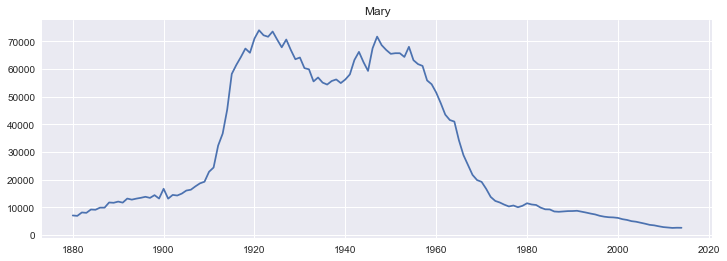

In [13]:
plot_name('F', 'Mary')

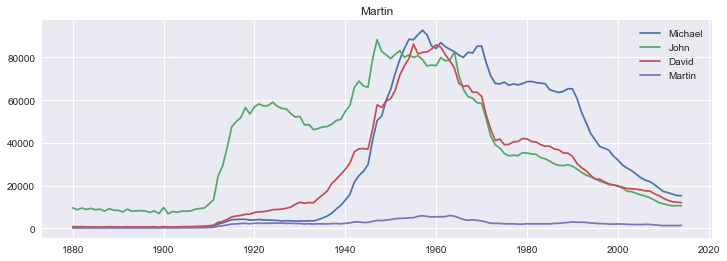

In [14]:
# plot for name popularity for each male name below.
names = ['Michael', 'John', 'David', 'Martin']

for name in names:
    plot_name('M', name)

plt.legend(names);

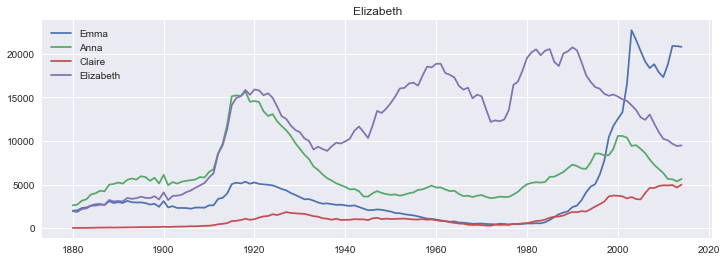

In [15]:
# same for females
names = ['Emma', 'Anna', 'Claire', 'Elizabeth']

for name in names:
    plot_name('F', name)
    
plt.legend(names);

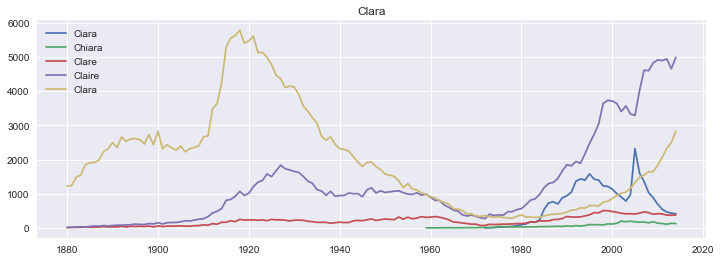

In [16]:
# the same for variants for name 'Claire'
names = ['Ciara', 'Chiara', 'Clare', 'Claire', 'Clara']

for name in names:
    plot_name('F', name)
    
plt.legend(names);

In [17]:
# check the data set for the variants
all_years_indexed.loc['F'].loc[names].head()

number
name  year        
Ciara 1972       5
      1974      16
      1975      26
      1976      26
      1977      36

In [18]:
# unstack it 
all_years_indexed.loc['F'].loc[names].unstack(level=0).head()

number                            
name  Ciara Chiara Clare Claire   Clara
year                                   
1880    NaN    NaN  15.0   21.0  1226.0
1881    NaN    NaN  20.0   23.0  1242.0
1882    NaN    NaN  21.0   30.0  1490.0
1883    NaN    NaN  22.0   38.0  1548.0
1884    NaN    NaN  38.0   33.0  1852.0

In [19]:
# and fill NaN values with zeros
variants = all_years_indexed.loc['F'].loc[names].unstack(level=0).fillna(0)
variants.head()

number                            
name  Ciara Chiara Clare Claire   Clara
year                                   
1880    0.0    0.0  15.0   21.0  1226.0
1881    0.0    0.0  20.0   23.0  1242.0
1882    0.0    0.0  21.0   30.0  1490.0
1883    0.0    0.0  22.0   38.0  1548.0
1884    0.0    0.0  38.0   33.0  1852.0

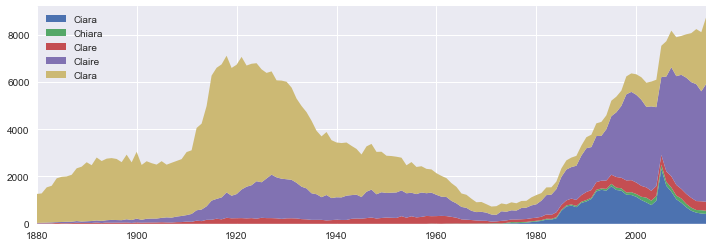

In [20]:
# plot the data with stackplot
plt.stackplot(variants.index, variants.values.T)
plt.legend(names, loc=2)
plt.xlim(1880, 2014);

<br>

#### A yearly top ten.
___

In [21]:
# select all male names for 2008 and sort them by number
pop2008 = all_years_indexed.loc['M', :, 2008].sort_values('number', ascending=False).head(10)
pop2008

number
sex name        year        
M   Jacob       2008   22568
    Michael     2008   20590
    Ethan       2008   20196
    Joshua      2008   19186
    Daniel      2008   18985
    Alexander   2008   18679
    William     2008   18380
    Anthony     2008   18378
    Christopher 2008   17928
    Matthew     2008   17573

In [22]:
# Drop sex and year columns
pop2008.reset_index().drop(['sex', 'year'], axis=1)

,name,number
0,Jacob,22568
1,Michael,20590
2,Ethan,20196
3,Joshua,19186
4,Daniel,18985
5,Alexander,18679
6,William,18380
7,Anthony,18378
8,Christopher,17928
9,Matthew,17573


In [23]:
def top_ten(sex, year):
    """ Function to select top ten names in any years """
    
    data = all_years_indexed.loc[sex, :, year].sort_values('number', ascending=False)
    data = data.reset_index().drop(['sex','year', 'number'],axis=1).head(10)
    
    data.index = data.index + 1
    data.columns = [year]
    
    return data

In [24]:
top_ten('F',2008)

,2008
1,Emma
2,Isabella
3,Emily
4,Olivia
5,Ava
6,Madison
7,Sophia
8,Abigail
9,Elizabeth
10,Chloe


In [25]:
def top_tens(sex, year_start, year_end):
    """ Top ten for a range of years """
    
    years = [top_ten(sex, year) for year in range(year_start, year_end+1)]
    return years[0].join(years[1:])

In [26]:
top_tens('F', 2000, 2008)

,2000,2001,2002,2003,2004,2005,2006,2007,2008
1,Emily,Emily,Emily,Emily,Emily,Emily,Emily,Emily,Emma
2,Hannah,Madison,Madison,Emma,Emma,Emma,Emma,Isabella,Isabella
3,Madison,Hannah,Hannah,Madison,Madison,Madison,Madison,Emma,Emily
4,Ashley,Ashley,Emma,Hannah,Olivia,Abigail,Isabella,Ava,Olivia
5,Sarah,Alexis,Alexis,Olivia,Hannah,Olivia,Ava,Madison,Ava
6,Alexis,Sarah,Ashley,Abigail,Abigail,Isabella,Abigail,Sophia,Madison
7,Samantha,Samantha,Abigail,Alexis,Isabella,Hannah,Olivia,Olivia,Sophia
8,Jessica,Abigail,Sarah,Ashley,Ashley,Samantha,Hannah,Abigail,Abigail
9,Elizabeth,Elizabeth,Samantha,Elizabeth,Samantha,Ava,Sophia,Hannah,Elizabeth
10,Taylor,Olivia,Olivia,Samantha,Elizabeth,Ashley,Samantha,Elizabeth,Chloe


In [27]:
top_tens('M', 2000, 2008)

,2000,2001,2002,2003,2004,2005,2006,2007,2008
1,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob
2,Michael,Michael,Michael,Michael,Michael,Michael,Michael,Michael,Michael
3,Matthew,Matthew,Joshua,Joshua,Joshua,Joshua,Joshua,Ethan,Ethan
4,Joshua,Joshua,Matthew,Matthew,Matthew,Matthew,Ethan,Joshua,Joshua
5,Christopher,Christopher,Ethan,Andrew,Ethan,Ethan,Matthew,Daniel,Daniel
6,Nicholas,Nicholas,Andrew,Ethan,Andrew,Andrew,Daniel,Christopher,Alexander
7,Andrew,Andrew,Joseph,Joseph,Daniel,Daniel,Andrew,Anthony,William
8,Joseph,Joseph,Christopher,Daniel,William,Anthony,Christopher,William,Anthony
9,Daniel,Daniel,Nicholas,Christopher,Joseph,Joseph,Anthony,Matthew,Christopher
10,Tyler,William,Daniel,Anthony,Christopher,Christopher,William,Andrew,Matthew


In [28]:
# select data for female names from 2000 to 2008 and stack it
top_tens('F', 2000, 2008).stack().head()

1  2000    Emily
   2001    Emily
   2002    Emily
   2003    Emily
   2004    Emily
dtype: object

In [29]:
# count the number of occurrences
popular = top_tens('F', 2000, 2008).stack().value_counts()
popular

Madison      9
Emily        9
Hannah       8
Abigail      8
Olivia       8
Emma         7
Samantha     7
Elizabeth    6
Ashley       6
Isabella     5
Alexis       4
Ava          4
Sarah        3
Sophia       3
Jessica      1
Chloe        1
Taylor       1
dtype: int64

In [32]:
# select the top 6
top6 = popular.index[:6]
top6

Index(['Madison', 'Emily', 'Hannah', 'Abigail', 'Olivia', 'Emma'], dtype='object')

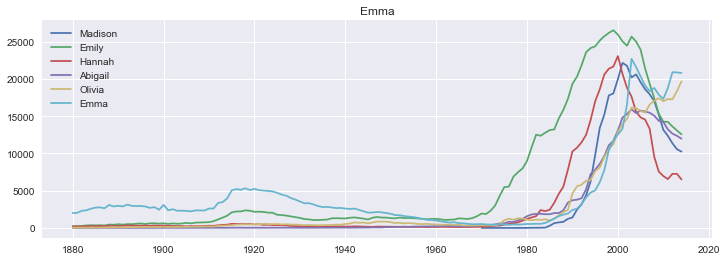

In [33]:
# plot them
for name in top6:
    plot_name('F', name)

plt.legend(top6);

<br>

___
#### End.